In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fam_role = pd.read_csv('cleaned_fam_role.csv', index_col='Unnamed: 0')
fam_role.head()

,post_date,job_family,role,count_id_indexed
0,2020-03-01,Healthcare,EXCUDE,1.0000
1,2020-03-01,Customer Service,Call Center Manager,1.0000
2,2020-03-01,Customer Service,Customer Service Manager,1.0000
3,2020-03-01,Customer Service,Customer Service Representative,1.0000
4,2020-03-01,Customer Service,Customer Support Representative,1.0000


In [3]:
fam_role[fam_role['role'].str.lower().str.contains('chief')]['role'].unique()

array(['Chief Accounting Officer', 'Chief Compliance Officer',
       'Chief Information Officer', 'Chief Security Officer',
       'Chief Diversity Officer', 'Chief Marketing Officer',
       'Chief Data Officer', 'Chief Risk Officer',
       'Chief Analytics Officer'], dtype=object)

In [4]:
fam_role[fam_role['role'].str.lower().str.contains('executive')]['role'].unique()

array(['Executive Chef', 'Executive Director', 'Executive Producer',
       'Television Executive', 'Key Account Executive',
       'Executive Compensation Specialist', 'Music Executive',
       'Film Executive'], dtype=object)

In [5]:
fam_role.shape

(619919, 4)

In [6]:
fam_role.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619919 entries, 0 to 619918
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   post_date         619919 non-null  object
 1   job_family        619919 non-null  object
 2   role              619919 non-null  object
 3   count_id_indexed  619919 non-null  object
dtypes: object(4)
memory usage: 23.6+ MB


In [7]:
fam_role = fam_role[(fam_role['count_id_indexed'] != '\\N')]

In [8]:
fam_role['count_id_indexed'] = fam_role['count_id_indexed'].astype(np.float64)

In [9]:
# for role in fam_role['role'].unique():
#     print(role)

In [10]:
# Look into Data Science Roles
# Look into Senior Roles
# Look into Manager Roles

## A look into Data Science roles

In [11]:
dsc_df = fam_role[(fam_role['role'].str.contains('Data')) & (fam_role['job_family'] == 'IT')].copy()
dsc_df.head()

,post_date,job_family,role,count_id_indexed
685,2020-03-01,IT,Data Administrator,1.0
686,2020-03-01,IT,Data Analyst,1.0
687,2020-03-01,IT,Data Architect,1.0
688,2020-03-01,IT,Data Center Manager,1.0
689,2020-03-01,IT,Data Consultant,1.0


In [12]:
dsc_df['post_date'] = pd.to_datetime(dsc_df['post_date']).dt.date

In [13]:
def get_97th_percentile(x):
    return np.percentile(x, 97)

In [14]:
dsc_df.groupby('role').mean()

,count_id_indexed
role,
Data Administrator,0.765803
Data Analyst,0.952088
Data Architect,2.444699
Data Center Manager,15.620776
Data Consultant,3.952444
Data Engineer,0.317336
Data Entry Operator,1.219693
Data Scientist,0.741893
Data Specialist,1.297217


In [15]:
roles_by_date = dsc_df.groupby(['post_date', 'role']).mean().reset_index()

In [16]:
# 2020 dates
roles_in_2020 = roles_by_date[roles_by_date['post_date'] < pd.to_datetime('2021-01-01')]

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [17]:
# 2021 dates
roles_in_2021 = roles_by_date[roles_by_date['post_date'] > pd.to_datetime('2021-01-01')]

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

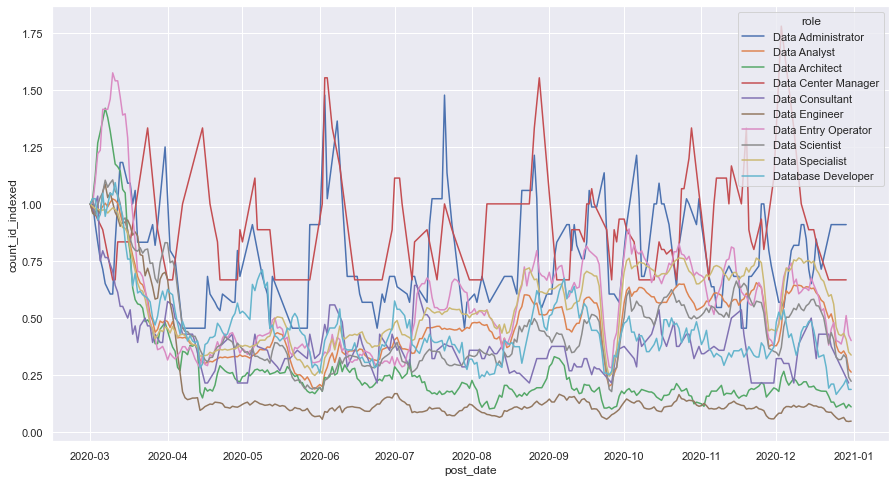

In [19]:
sns.lineplot(data=roles_in_2020, x='post_date', y='count_id_indexed', hue='role')

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


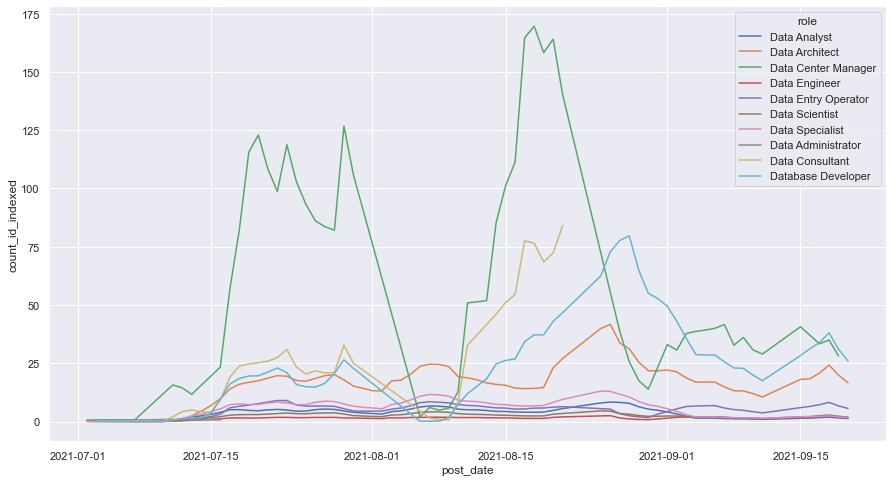

In [20]:
sns.lineplot(data=roles_in_2021[roles_in_2021['post_date'] > pd.to_datetime('2021-07')], x='post_date', y='count_id_indexed', hue='role')
plt.show()

On multiple occasions the, Data Center Managers have a huge increase in jobs relative to before COVID. This could be a data entry error or it could be legitament. It's not simply one entry that is extremely high, but a period of extremely high postings. According to my research, there are a lot of openings that need to be filled for Data Center Management. This increase could also be due to the large amount of COVID time data that needed to be managed.

In [21]:
roles_in_2021[roles_in_2021['count_id_indexed'] > 75]

,post_date,role,count_id_indexed
4041,2021-07-18,Data Center Manager,82.2667
4050,2021-07-19,Data Center Manager,115.6000
4059,2021-07-20,Data Center Manager,122.9333
4068,2021-07-21,Data Center Manager,108.4467
4077,2021-07-22,Data Center Manager,98.6667
4086,2021-07-23,Data Center Manager,118.7600
4095,2021-07-24,Data Center Manager,102.9533
4104,2021-07-25,Data Center Manager,93.2400
4113,2021-07-26,Data Center Manager,86.0933
4122,2021-07-27,Data Center Manager,83.6200


## Remove all extremely high values

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


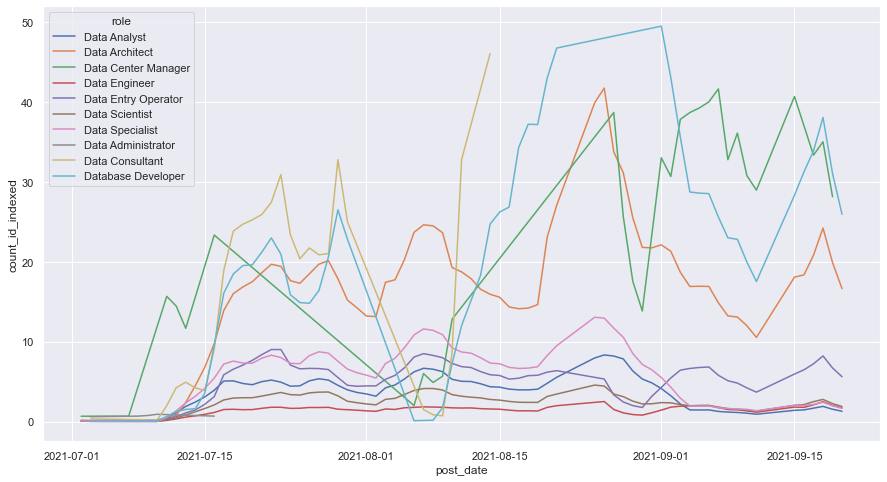

In [22]:
sns.lineplot(data=roles_in_2021[(roles_in_2021['post_date'] > pd.to_datetime('2021-07')) & (roles_in_2021['count_id_indexed'] < 50)], x='post_date', y='count_id_indexed', hue='role')
plt.show()

## A look into Manager roles

In [23]:
managers_df = fam_role[fam_role['role'].str.lower().str.contains('manager')]
managers_df.head()

,post_date,job_family,role,count_id_indexed
1,2020-03-01,Customer Service,Call Center Manager,1.0
2,2020-03-01,Customer Service,Customer Service Manager,1.0
5,2020-03-01,Customer Service,Relationship Manager,1.0
7,2020-03-01,Customer Service,Service Desk Manager,1.0
8,2020-03-01,Customer Service,Service Manager,1.0


There are a lot of Manger roles that aren't in the same industry, so let's split them before we compare job postings.
Different manager roles will probably come up more often than others (i.e. Food Service Managers than a Accounting Manager)

In [24]:
managers_df['role'].nunique()

142

In [25]:
managers_df['role'].unique()[:20]

array(['Call Center Manager', 'Customer Service Manager',
       'Relationship Manager', 'Service Desk Manager', 'Service Manager',
       'Box Office Manager', 'Event Manager/Planner',
       'Membership Manager', 'Park Manager', 'Promotions Manager',
       'Stage Manager', 'Studio Manager', 'Technical Manager',
       'Community Manager', 'Construction Manager', 'Facilities Manager',
       'Maintenance Manager', 'Property Manager', 'Accounting Manager',
       'Apartment Manager'], dtype=object)

In [26]:
managers_df['post_date'] = pd.to_datetime(managers_df['post_date']).dt.date

/var/folders/mv/m9p7xj3x64ddcm_shh2yq5p00000gn/T/ipykernel_87522/1521443055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  managers_df['post_date'] = pd.to_datetime(managers_df['post_date']).dt.date


In [27]:
# 2020 dates
managers_2020 = managers_df[managers_df['post_date'] < pd.to_datetime('2021-01-01')]

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [28]:
# 2021 dates
managers_2021 = managers_df[managers_df['post_date'] >= pd.to_datetime('2021-01-01')]

In [29]:
# Aggregate count_id_index for mean per job family
managers_2020_grouped = managers_2020.groupby(['job_family', 'post_date']).mean()
managers_2020_grouped.head()

count_id_indexed
job_family       post_date                   
Customer Service 2020-03-01           1.00000
                 2020-03-02           0.98530
                 2020-03-03           1.01350
                 2020-03-04           1.03700
                 2020-03-05           1.04206

In [30]:
# Aggregate count_id_index for mean per job family
managers_2021_grouped = managers_2021.groupby(['job_family', 'post_date']).mean()
managers_2021_grouped = managers_2021_grouped.reset_index()
managers_2021_grouped.head()

,job_family,post_date,count_id_indexed
0,Customer Service,2021-01-01,0.42378
1,Customer Service,2021-01-02,0.43306
2,Customer Service,2021-01-03,0.43638
3,Customer Service,2021-01-04,0.41700
4,Customer Service,2021-01-05,0.48594


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

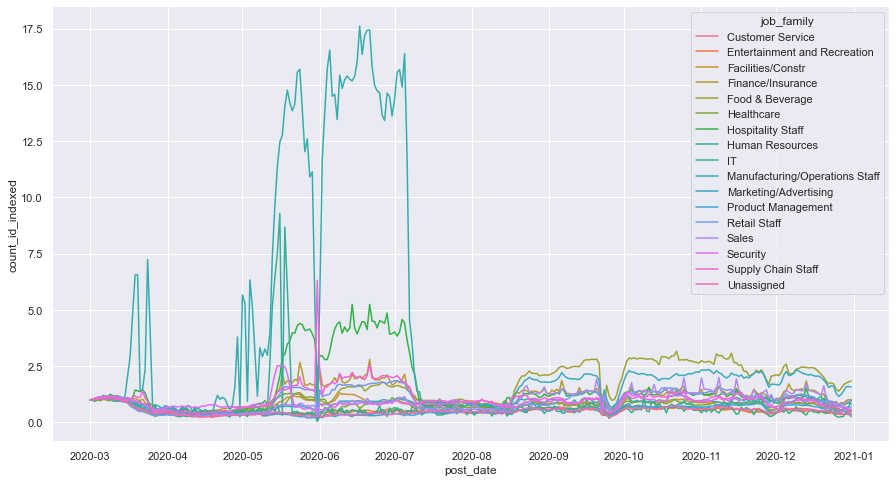

In [31]:
sns.lineplot(data=managers_2020_grouped, x='post_date', y='count_id_indexed', hue='job_family')

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

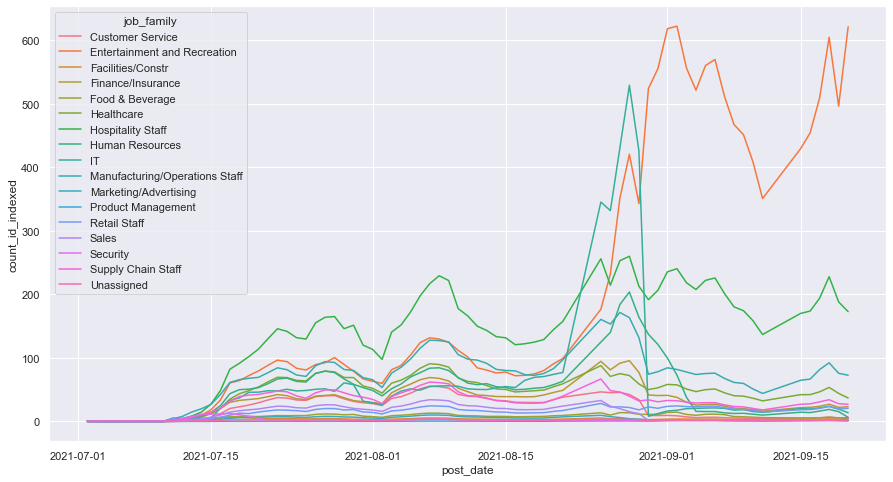

In [32]:
sns.lineplot(data=managers_2021_grouped[(managers_2021_grouped['post_date'] > pd.to_datetime('2021-07'))], x='post_date', y='count_id_indexed', hue='job_family')

#### Filming for hollywood won't start until september 2021
https://www.projectcasting.com/blog/news/when-filming-will-start/

### Healthcare also makes sense because covid cases increased around that time as well
https://www.projectcasting.com/blog/news/when-filming-will-start/

/Users/ethanshapiro/Repositories/HDSI_Deloitte_Project/env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

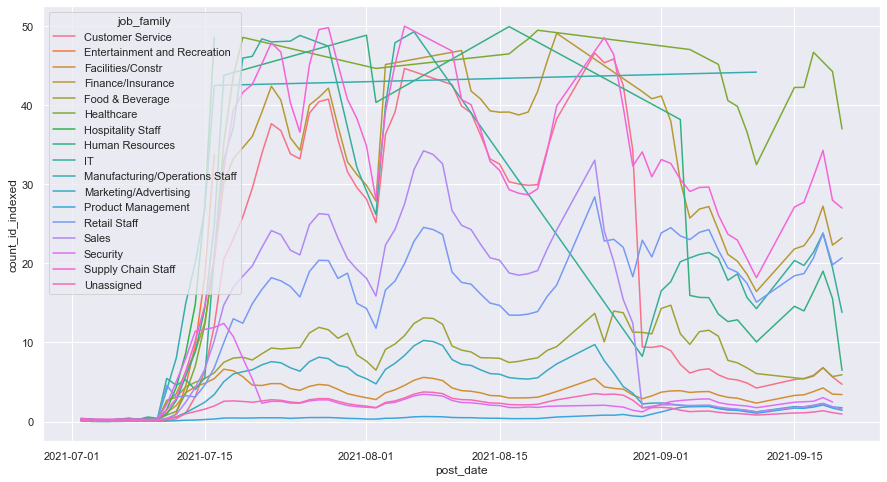

In [33]:
sns.lineplot(data=managers_2021_grouped[(managers_2021_grouped['post_date'] > pd.to_datetime('2021-07')) & (managers_2021_grouped['count_id_indexed'] < 50)], x='post_date', y='count_id_indexed', hue='job_family')

## Standardizing by role to see which roles had the biggest decrease or increase over time

In [34]:
# Standardize within roles
fam_role['standardized_id'] = fam_role.groupby('role')[['count_id_indexed']].transform(lambda x: (x - x.mean())/np.std(x))

In [35]:
# subtract each standardized_id by the first date
fam_role['standardized_id'] = fam_role.groupby('role')['standardized_id'].transform(lambda x: x - x.iloc[0])

In [36]:
overall_diff = fam_role.groupby('role')[['standardized_id']].mean().sort_values('standardized_id', ascending=True).reset_index()

In [37]:
import plotly.express as px

In [38]:
# Bottom 5 plot
fig = px.bar(overall_diff.iloc[:5, :], x='role', y='standardized_id')
fig.update_traces(opacity=0.5, marker_color='red')

In [42]:
fig.write_html('pages/Visualizations_Ethan/bottom_5.html')

### Why Tax Professionals Decreased so much: 

I believe there are two reasons that Tax Professionals decreased so much compared to before covid. 
<br>
1. The [tax deadline](https://turbotax.intuit.com/tax-tips/general/the-2020-tax-deadline-extension-everything-you-need-to-know/L8Ph4Vnci) was extended to May 17th in 2021 due to COVID.
2. Around 80% of Americans file their taxes using either TurboTax or without any assistance at all. [Reference](https://www.gobankingrates.com/taxes/filing/tax-professionals-for-taxes/) 

### Why Kitchen Manager jobs decreased
Since many restaurants were closed during covid or only doing delivery/takeout, there wasn't as much of a need for kitchen Managers because there wasn't as much of a time crunch for getting food out all together/on time.

### Why Sales roles decreased
Similarly to above, many stores closed for quite awhile and therefore didn't need sales people. Even when they did reopen, there were limited people allowed in stores, so they didn't require as many sales people.

### Why Auto Mechanic roles decreased
Since many places were closed and many people stayed at home, they didn't drive their vehicles and therefore didn't need to get maintenance done. 

### Why Team Member roles decreased
This one is more difficult to figure out because the roles aren't specific to an industry. It's hard to pinpoint what being a Team Member even means. Even so, we can assume that during COVID anyone who might call themselves a team member (Grocery, clothing, department, etc. store workers) weren't working and therefore there were less postings for them.

In [43]:
# Top 5 plot
fig = px.bar(overall_diff.take(range(-1, -6, -1)), x='role', y='standardized_id')
fig.update_traces(opacity=0.5, marker_color='green')

### Why Real Estate Manager roles increased

Since people who own property can't necessarily travel to their properties, they would hire someone who is near or onsite that could manage it for them.

### Why Bakery Supervisor roles increased

This one isn't obvious why it would increase. This culd be due to COVID making people stay at home and more people explore their baking passion. So, when things began to open again, people started their own baking business and required a bakery supervisor.

### Why Busperson roles increased 

In 2021 there was a huge bus driver shortage. This [shortage](https://abcnews.go.com/US/school-districts-nationwide-facing-bus-driver-shortages/story?id=79124876) was already present, but it was made even worse by COVID.

### Why Bricklayer roles increased

Residential construction increased 14.9% which could be the cause of the Bricklayer role increase. Otherwise, I'm not exactly sure why.

### Advertising Manager role increase

During 2021, there was an overall increase of 9.1% in marketing specifically. Over 17% of those were going to Senior Managers.

In [44]:
fig.write_html('pages/Visualizations_Ethan/top_5.html')